<h1> Car Sales Data Analysis </h1>

<h3> Objective:</h3> <p> The objective of this analysis is to explore the vehicle dataset to uncover key trends and relationships between various features such as engine size, fuel efficiency, drivetrain, and pricing. By analyzing these factors, we aim to understand what influences vehicle pricing and performance, identify regional and categorical trends, and provide actionable insights for automotive businesses and customers.
</p>

<h3>Importing Libraries</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Importing and Reading data</h3>

In [8]:
data = pd.read_csv(r"C:\Users\KEVIN\Downloads\file.csv")

In [10]:
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [47]:
data.shape

(432, 15)

In [17]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

<h3> Cleaning</h3>

In [14]:
data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [20]:
data = data.dropna()

In [22]:
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [50]:
duplicates = data[data.duplicated()]

In [52]:
print(duplicates)

Empty DataFrame
Columns: [Make, Model, Type, Origin, DriveTrain, MSRP, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase, Length]
Index: []


In [56]:
data.duplicated().sum()

0

<h3> Visualisation</h3>

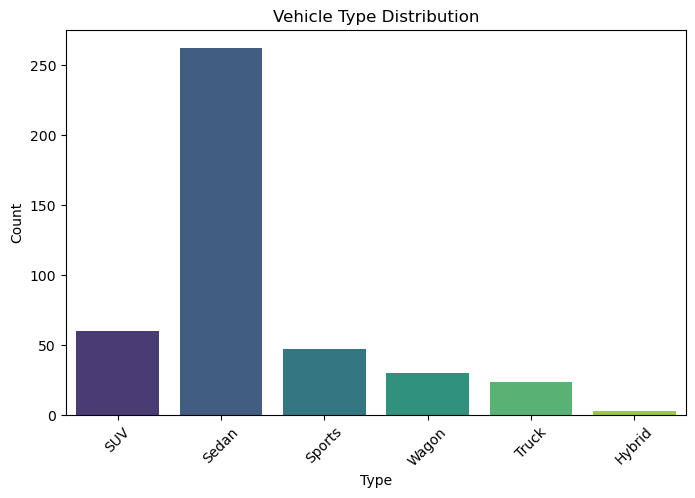

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type',hue='Type', data=data, palette='viridis')
plt.title('Vehicle Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



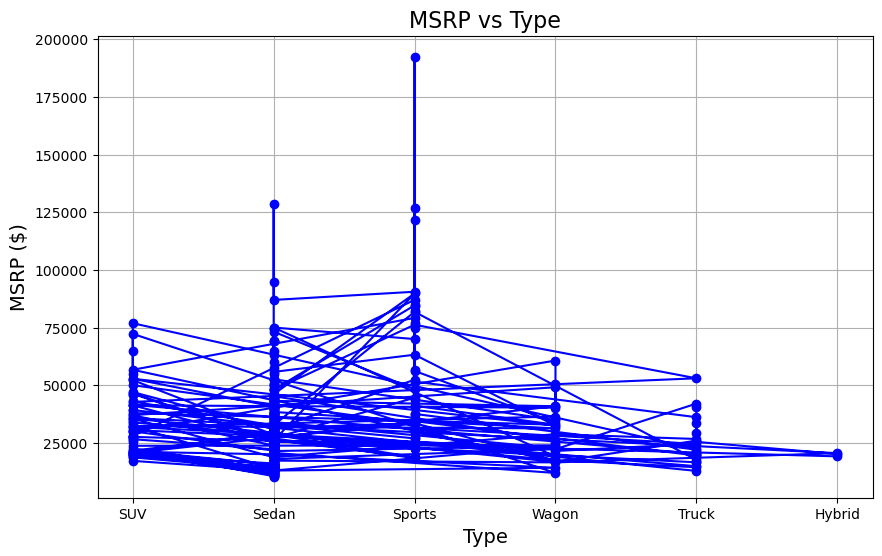

In [38]:
data['MSRP'] = data['MSRP'].replace(r'[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
plt.plot(data['Type'], data['MSRP'], marker='o', linestyle='-', color='b')
plt.title('MSRP vs Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('MSRP ($)', fontsize=14)
plt.grid(True)
plt.show()



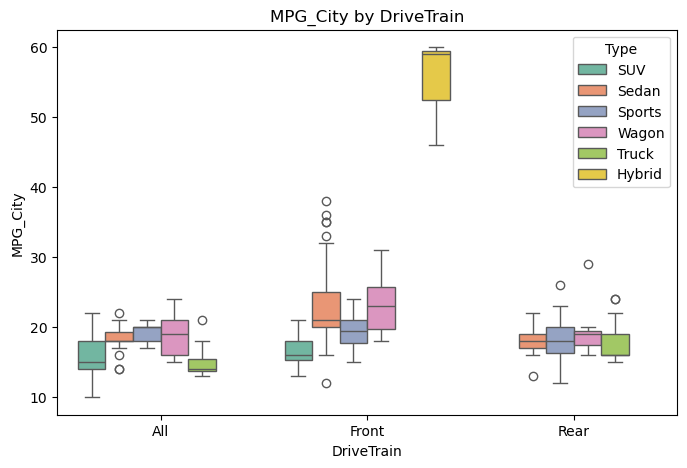

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DriveTrain',hue='Type', y='MPG_City', data=data, palette='Set2')
plt.title('MPG_City by DriveTrain')
plt.xlabel('DriveTrain')
plt.ylabel('MPG_City')
plt.show()




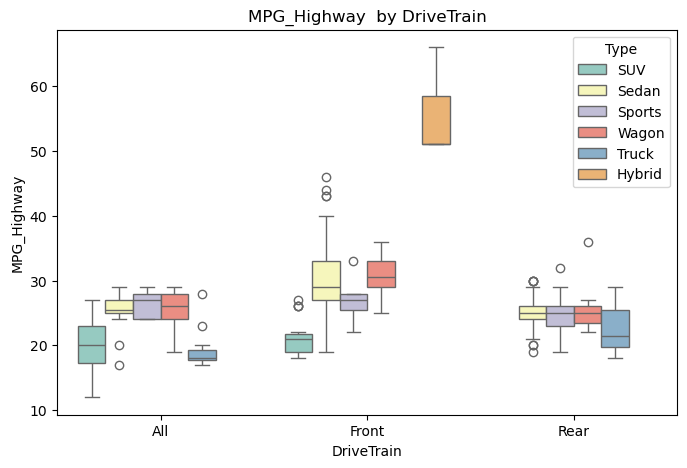

In [132]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='DriveTrain', y='MPG_Highway',hue='Type', data=data, palette='Set3')
plt.title('MPG_Highway  by DriveTrain')
plt.xlabel('DriveTrain')
plt.ylabel('MPG_Highway')
plt.show()

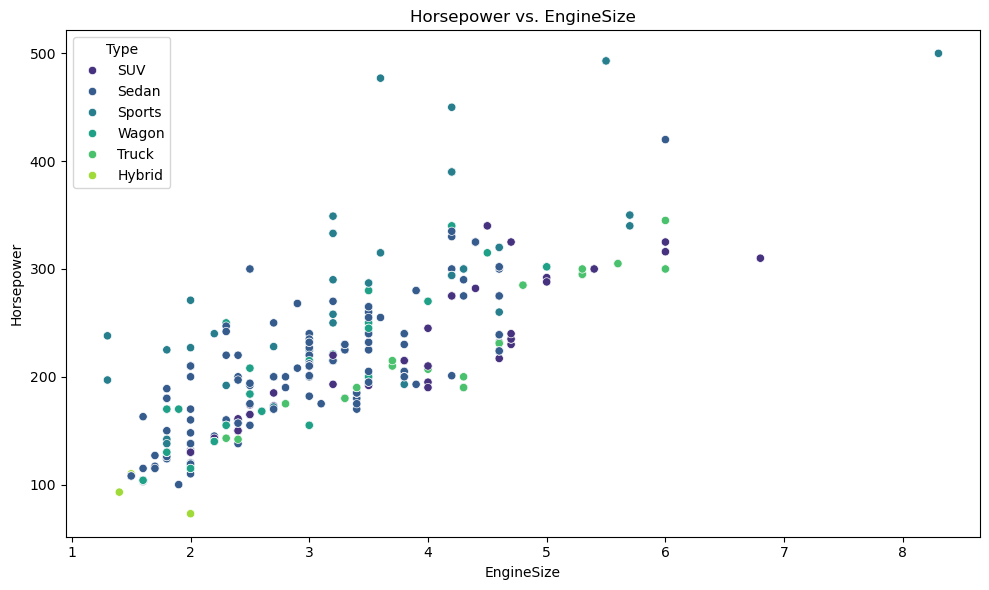

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngineSize', y='Horsepower', hue='Type', data=data, palette='viridis')
plt.title('Horsepower vs. EngineSize')
plt.xlabel('EngineSize')
plt.ylabel('Horsepower')
plt.tight_layout()
plt.show()

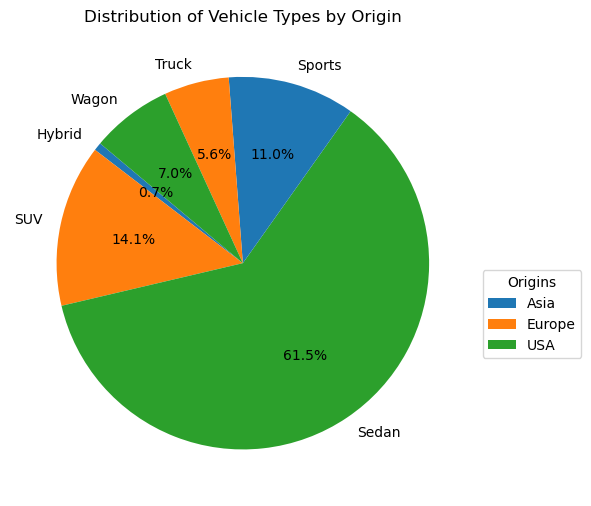

In [42]:
type_origin_counts = data.groupby(['Type', 'Origin']).size().unstack(fill_value=0)
type_totals = type_origin_counts.sum(axis=1)
origin_totals = type_origin_counts.sum(axis=0)  
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
colors = plt.cm.tab10.colors[:len(origin_totals)]
plt.pie(
    type_totals,
    labels=type_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.legend(
    origin_totals.index,
    title="Origins",
    loc="best",
    bbox_to_anchor=(1, 0.5)  
)
plt.title('Distribution of Vehicle Types by Origin')
plt.tight_layout()  
plt.show()


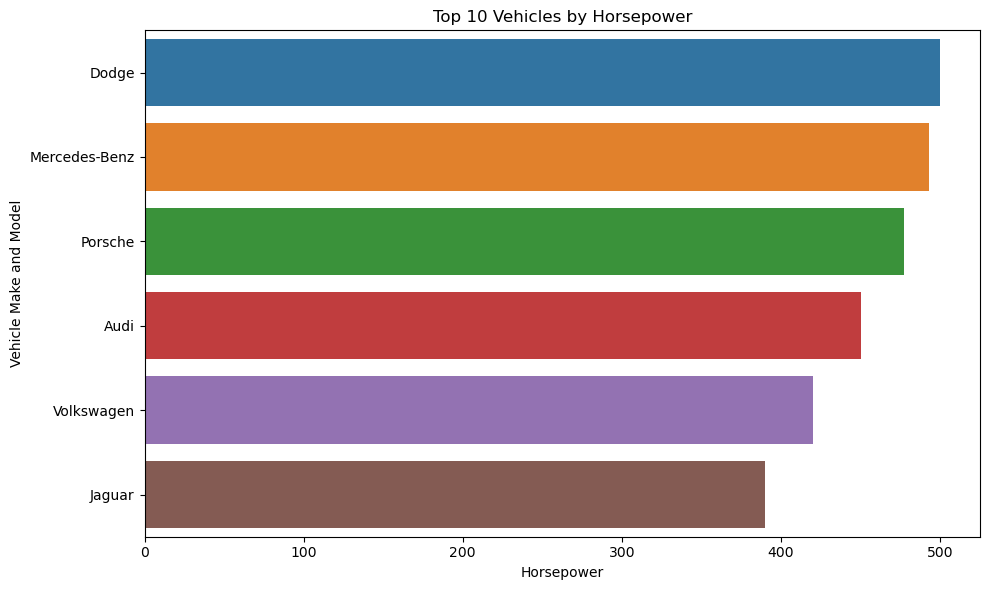

In [30]:
plt.figure(figsize=(10, 6))
top_hp_fuel = data.nlargest(10, ['Horsepower', 'Cylinders'])
sns.barplot(data=top_hp_fuel, x='Horsepower', y='Make', hue='Make', dodge=False, legend=False)
plt.title('Top 10 Vehicles by Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()

<h3> Conclusion </h3>

This project provided an in-depth analysis of automobile data, offering valuable insights into customer preferences, vehicle performance, and pricing trends. The results highlighted that fuel efficiency and drivetrain type are key factors influencing customer satisfaction, suggesting a shift towards more economical and versatile vehicles. Top-performing vehicles were identified, showcasing standout performers in terms of horsepower, MPG, and pricing. These findings offer actionable recommendations for manufacturers to enhance their product offerings, tailor marketing strategies, and improve overall sales performance. By leveraging data-driven insights, stakeholders can make informed decisions to remain competitive and better serve their customers.

